In [63]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv")

df.head()

#Columns Information:
# 1. employee_id - ID of the Employee
# 2. number_project - Number of projects completed in the company
# 3. average_monthly_hours - average monthly hours worked in the company
# 4. time_spend_company - Number of years in the company
# 5. work_accidents
# 6. left - 1 if employee has left, otherwise 0
# 7. promotion_last_5years - number of times promoted in last 5 years
# 8. department - employee department
# 9. salary - categorical value of salary range

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [64]:
df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [66]:
print(df['department'].unique())
print(df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [67]:
print(df['department'].value_counts())
print('\n')
print(df['salary'].value_counts())

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


In [68]:
df.shape

(14999, 9)

**Loading Evaluation and Employee Satisfaction Survey**

In [69]:
sat_df = pd.read_excel("https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx")

sat_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [70]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [71]:
main_df = df.set_index('employee_id').join(sat_df.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [72]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


<Axes: >

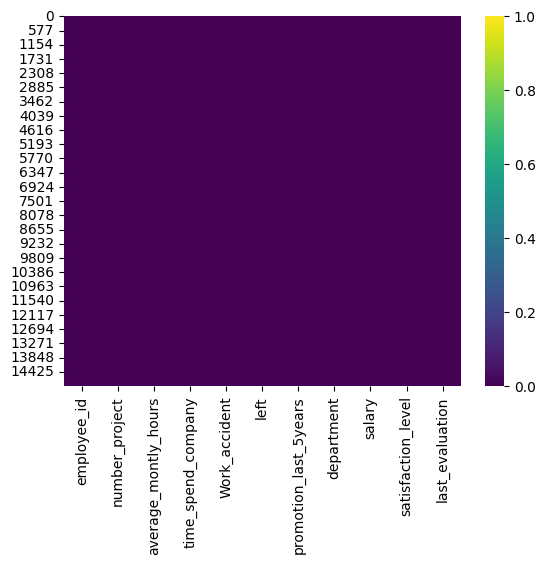

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(main_df.isnull(), cmap='viridis')

In [74]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [75]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [77]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [78]:
main_df['satisfaction_level'].fillna(main_df['satisfaction_level'].mean(), inplace=True)
main_df['last_evaluation'].fillna(main_df['last_evaluation'].mean(), inplace=True)

<ipython-input-78-45c11efc9f3b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['satisfaction_level'].fillna(main_df['satisfaction_level'].mean(), inplace=True)
<ipython-input-78-45c11efc9f3b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [79]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14999 non-null  float64
 10  last_evaluation        14999 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [80]:
main_df[main_df['employee_id']==3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [81]:
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [82]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,satisfaction_level,last_evaluation
department,,,,,,,,,
IT,4683,248119,4256,164,273,3,mediummediummediummediummediummediumlowlowlowl...,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,mediummediummediummediummediummediummediummedi...,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,lowlowlowlowmediummediummediumlowmediummediumm...,446.68283,550.706125
hr,2701,146828,2480,89,215,15,lowlowlowlowmediummediummediumhighmediummedium...,442.53566,524.006125
management,2432,126787,2711,103,91,69,mediumlowlowlowlowlowlowmediumlowmediumlowlowl...,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,mediumlowlowlowlowlowlowlowlowlowlowlowlowlowl...,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,mediummediummediummediummediumhighlowmediummed...,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,lowmediummediumlowlowlowlowlowlowlowlowlowlowl...,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,lowlowlowlowlowlowlowlowlowlowlowlowlowlowlowl...,1377.90849,1611.534499


In [83]:
main_df_final['left'].value_counts()

,count
left,
0,11428
1,3571


In [86]:
main_df_final[main_df_final['left']==1].groupby('department')['left'].sum()

,left
department,
IT,273
RandD,121
accounting,204
hr,215
management,91
marketing,203
product_mng,198
sales,1014
support,555


<Axes: >

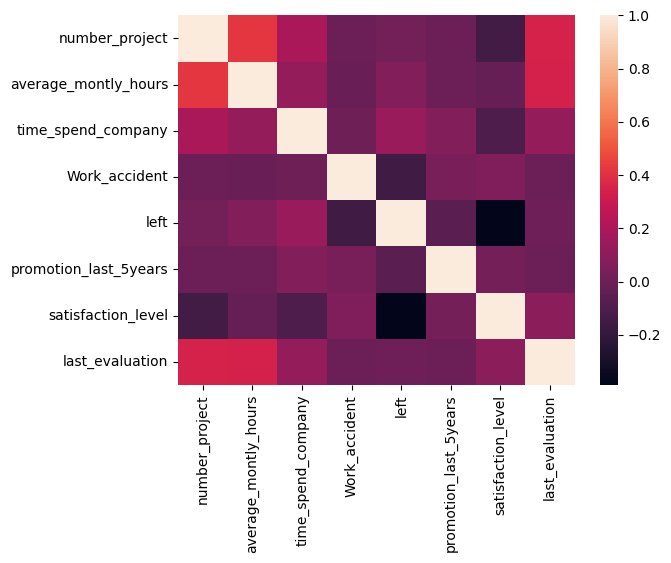

In [87]:
sns.heatmap(main_df_final.drop(columns=['department', 'salary']).corr())

**Preparing Dataset for ML algorithm**

In [88]:
categorical = ['department', 'salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorical, drop_first=True, dtype=float)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5,262,6,0,1,0,0.80,0.86,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,7,272,4,0,1,0,0.11,0.88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,5,223,5,0,1,0,0.72,0.87,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2,159,3,0,1,0,0.37,0.52,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [89]:
len(main_df_final.columns)

19

In [90]:
from sklearn.model_selection import train_test_split

X = main_df_final.drop(['left'], axis=1).values

y  = main_df_final['left'].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [92]:
#Normalize the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.655401,-1.446725,-1.036916,-0.411283,-0.147986,-0.088535,-1.450280,4.315588,-0.229197,-0.228275,-0.208151,-0.24663,-0.256687,-0.619086,-0.416177,-0.476692,-0.968585,1.140127
1,0.152235,-0.186313,0.336265,-0.411283,-0.147986,-1.693641,1.658226,-0.231718,4.363056,-0.228275,-0.208151,-0.24663,-0.256687,-0.619086,-0.416177,-0.476692,1.032433,-0.877095
2,0.152235,0.013752,-1.036916,-0.411283,-0.147986,0.673891,1.130367,-0.231718,-0.229197,-0.228275,-0.208151,-0.24663,-0.256687,1.615285,-0.416177,-0.476692,-0.968585,1.140127
3,0.959870,-0.886542,0.336265,-0.411283,-0.147986,-1.171982,-0.159956,-0.231718,4.363056,-0.228275,-0.208151,-0.24663,-0.256687,-0.619086,-0.416177,-0.476692,1.032433,-0.877095
4,0.959870,0.994073,1.022856,-0.411283,-0.147986,0.433125,0.837111,-0.231718,-0.229197,-0.228275,-0.208151,-0.24663,-0.256687,1.615285,-0.416177,-0.476692,1.032433,-0.877095


**Logistic Regression**

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

Accuracy 79.78%


[[3191  253]
 [ 657  399]]


              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3444
           1       0.61      0.38      0.47      1056

    accuracy                           0.80      4500
   macro avg       0.72      0.65      0.67      4500
weighted avg       0.78      0.80      0.78      4500



In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

Accuracy 98.87%


[[3436    8]
 [  43 1013]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3444
           1       0.99      0.96      0.98      1056

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



**Deep Learning Application**

In [96]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [97]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer="uniform", activation="relu", input_dim=18))
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │             171 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [100]:
# Training our classifier

batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9512 - loss: 0.1706 - val_accuracy: 0.9542 - val_loss: 0.1647
Epoch 2/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9601 - loss: 0.1531 - val_accuracy: 0.9542 - val_loss: 0.1633
Epoch 3/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9554 - loss: 0.1651 - val_accuracy: 0.9536 - val_loss: 0.1623
Epoch 4/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9539 - loss: 0.1670 - val_accuracy: 0.9531 - val_loss: 0.1615
Epoch 5/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9559 - loss: 0.1610 - val_accuracy: 0.9540 - val_loss: 0.1597
Epoch 6/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9534 - loss: 0.1624 - val_accuracy: 0.9533 - val_loss: 0.1597
Epoch 7/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9521 - loss: 0.1663 - val_accuracy: 0.9551 - val_loss: 0.1577
Epoch 8/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9576 - loss: 0.1572 - 

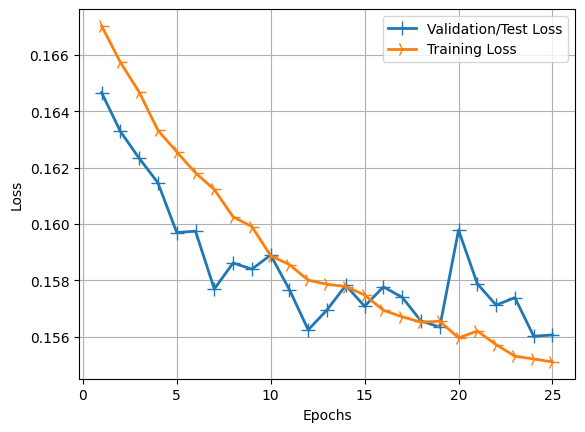

In [101]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [102]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[3334  110]
 [ 100  956]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3444
           1       0.90      0.91      0.90      1056

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500

